In [495]:
from U_Net_D import unet, dice_loss, get_data
from tensorflow.keras.optimizers import Adam

In [496]:
adam = Adam(learning_rate=1e-3)
img_row = 256
img_col = 256
img_chan = 1
input_size = (img_row, img_col, img_chan)

In [497]:
model = unet(adam, input_size, dice_loss)

In [498]:
model_path = "../model/model-T_unet-maproad-fc2d.weights.h5"
model.load_weights(model_path)

In [499]:
path_test = '../training_dataset/tianditu/test/'
X_test, y_test = get_data(path_test, train=True)

Getting and resizing images ... 
Done!


In [500]:
y_pred = model.predict(X_test)

2/2 [==============================] - 3s 537ms/step


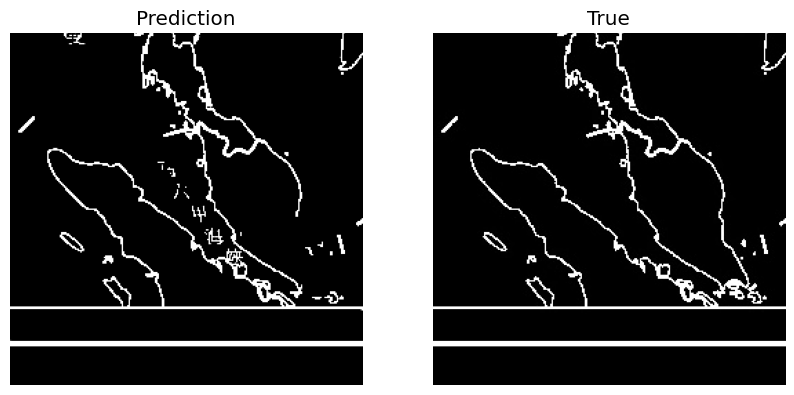

In [501]:
import matplotlib.pyplot as plt

for i in range(1):
    fig, ax = plt.subplots(1, 2, figsize=(10, 15))
    ax[0].imshow(y_pred[i].squeeze(), cmap="gray")
    ax[0].set_title("Prediction")

    ax[1].imshow(y_test[i].squeeze(), cmap="gray")
    ax[1].set_title("True")

    for a in ax:
        a.axis("off")

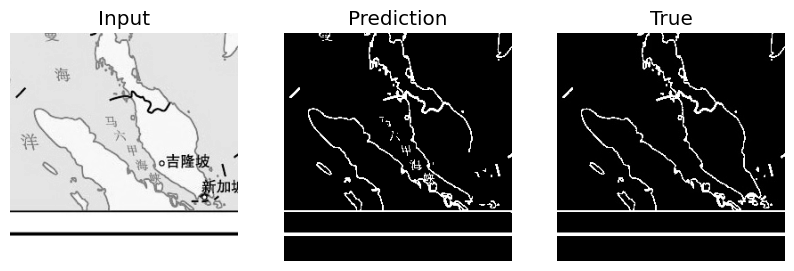

In [502]:
# Plot prediction, true and input image
import matplotlib.pyplot as plt

for i in range(1):
    fig, ax = plt.subplots(1, 3, figsize=(10, 15))
    ax[0].imshow(X_test[i].squeeze(), cmap="gray")
    ax[0].set_title("Input")

    ax[1].imshow(y_pred[i].squeeze(), cmap="gray")
    ax[1].set_title("Prediction")

    ax[2].imshow(y_test[i].squeeze(), cmap="gray")
    ax[2].set_title("True")

    for a in ax:
        a.axis("off")

In [503]:
# load image example3.png
# split it into 256x256 patches
# predict the patches
# reconstruct the image

In [504]:
from tensorflow.keras.preprocessing.image import load_img

In [505]:
img = load_img('../training_dataset/tianditu/test/images/0.jpg')

In [506]:
import numpy as np

from tensorflow.keras.utils import img_to_array
from skimage.transform import resize

train = False
X = np.zeros((40, 256, 256, 1), dtype=np.float32)

print('Getting and resizing images ... ')
x_img = img_to_array(img)
x_img = resize(x_img, (256, 256, 1), mode='constant', preserve_range=True)

X[0, ..., 0] = x_img.squeeze() / 255

print('Done!')

Getting and resizing images ... 
Done!


In [507]:
from tqdm import tqdm_notebook
import os

im_height = 256
im_width = 256

X = np.zeros((1, 256, 256, 1), dtype=np.float32)
if train:
    y = np.zeros((1, im_height, im_width, 1), dtype=np.float32)
img = load_img('../training_dataset/tianditu/test/images/0.jpg')
x_img = img_to_array(img)
x_img = resize(x_img, (256, 256, 1), mode='constant', preserve_range=True)

X[0, ..., 0] = x_img.squeeze() / 255

In [508]:
X.shape

(1, 256, 256, 1)

In [509]:
img = load_img('../training_dataset/tianditu/test/custom/col.png')
img = img_to_array(img)
img = resize(img, (256, 256, 1), mode='constant', preserve_range=True)
X = np.zeros((1, 256, 256, 1), dtype=np.float32)
X[0, ..., 0] = img.squeeze() / 255

In [510]:
# split the image into 256x256 patches
pred = model.predict(X, verbose=1)

1/1 [==============================] - 0s 106ms/step


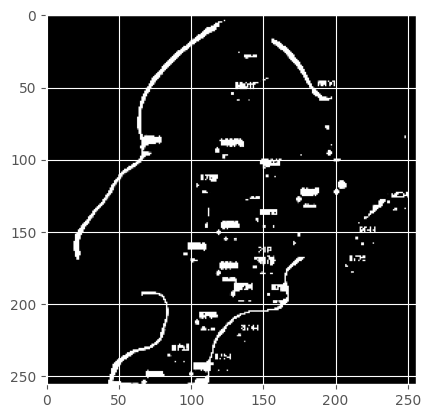

In [511]:
plt.imshow(pred[0].squeeze(), cmap="gray")

In [512]:
def split_image(img, patch_size):
    patches = []
    x_count = img.shape[0] // patch_size
    y_count = img.shape[1] // patch_size
    print(x_count, y_count)
    for i in range(x_count):
        for j in range(y_count):
            patch = img[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]
            patches.append(patch)
    return np.array(patches)

1/1 [==============================] - 0s 108ms/step


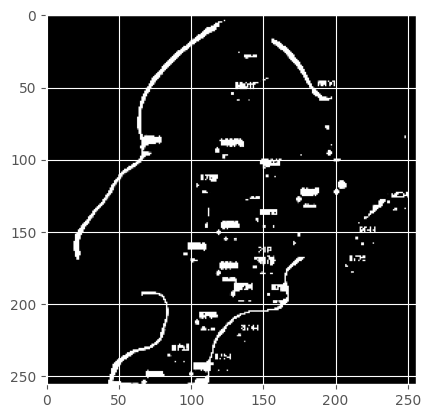

In [513]:
X = np.zeros((1, 256, 256, 1), dtype=np.float32)
X[0, ..., 0] = img.squeeze() / 255
pred = model.predict(X)
plt.imshow(pred.squeeze(), cmap="gray")

In [514]:
patches = split_image(img, 256)

1 1


1/1 [==============================] - 0s 108ms/step


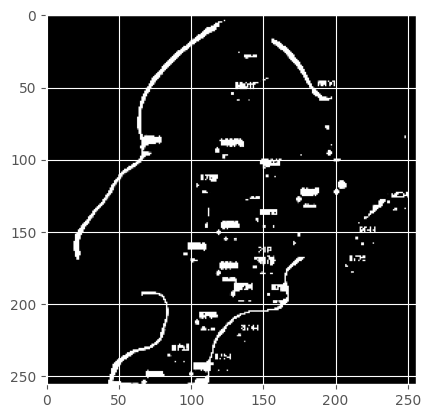

In [515]:
X = np.zeros((len(patches), 256, 256, 1), dtype=np.float32)
for i in range(len(patches)):
    X[i, ..., 0] = patches[i].squeeze() / 255
pred = model.predict(X)
plt.imshow(pred[0].squeeze(), cmap="gray")

In [516]:
patches.shape

(1, 256, 256, 1)

In [517]:
X = np.zeros((len(patches), 256, 256, 1), dtype=np.float32)
for i in range(len(patches)):
    X[i, ..., 0] = patches[i].squeeze() / 255

In [518]:
pred_patches = model.predict(X)

1/1 [==============================] - 0s 105ms/step


In [519]:
pred_patches.shape

(1, 256, 256, 1)

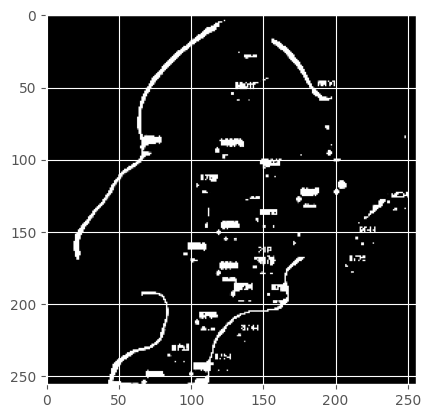

In [520]:
plt.imshow(pred_patches[0].squeeze(), cmap="gray")

In [521]:
# reconstruct the image
patches[0].shape
img.shape

(256, 256, 1)

In [522]:
def reconstruct_image(patches, img_shape):
    x_count = img_shape[0] // 256
    y_count = img_shape[1] // 256
    img = np.zeros(img_shape)
    for i in range(x_count):
        for j in range(y_count):
            img[i * 256:(i + 1) * 256, j * 256:(j + 1) * 256] = patches[i * y_count + j]
    return img

In [523]:
reconstructed_img = reconstruct_image(pred_patches, img.shape)

In [524]:
reconstructed_img.shape

(256, 256, 1)

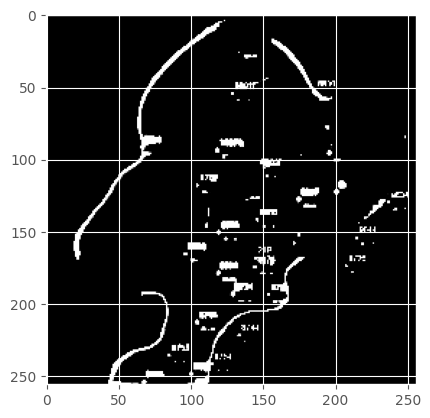

In [525]:
plt.imshow(reconstructed_img, cmap="gray")

In [526]:
# save the reconstructed image
# Rescale it to 0-255
reconstructed_img = (reconstructed_img - np.min(reconstructed_img)) / (
        np.max(reconstructed_img) - np.min(reconstructed_img)) * 255

In [527]:
from PIL import Image

In [528]:
reconstructed_img = Image.fromarray(reconstructed_img)

TypeError: Cannot handle this data type: (1, 1, 1), <f8

In [ ]:
reconstructed_img = reconstructed_img.convert('L')
#reconstructed_img.save('../training_dataset/tianditu/test/images/big_pred.png')

In [ ]:
def predict_image(img_path, model):
    patch_size = 256
    img = load_img(img_path, color_mode="grayscale")
    img = np.array(img)
    patches = split_image(img, patch_size)
    pred_patches = model.predict(patches)
    reconstructed_img = reconstruct_image(pred_patches, img.shape)
    # plot predicted and true image
    fig, ax = plt.subplots(1, 2, figsize=(10, 15))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Input")

    ax[1].imshow(reconstructed_img, cmap="gray")
    ax[1].set_title("Prediction")

    for a in ax:
        a.axis("off")
    plt.show()

In [ ]:
predict_image('../training_dataset/tianditu/test/images/0.jpg', model)